In [24]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

```The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 ...', Wiley, 1980.   N.B. Various transformations are used in the table on
 pages 244-261 of the latter.

 Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's
```

In [25]:
df =  pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")
df.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [26]:
# SHAPE
df.shape

(506, 14)

#### Insights:
The dataset has 14 features and 506 datapoints

In [27]:
# INFO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


#### Insights:
1. All values are numerical in nature including our target variable medv
2. No missing values reported
3. CHAS is a binominal variable which is already numerically encoded

In [28]:
# DESCRIPTION OF DATA
df.describe()

crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            lstat        medv  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

#### Insights
1. All features are on different scales so definitely requires feature scaling
2. Tax has the highest mean followed by b

<Axes: >

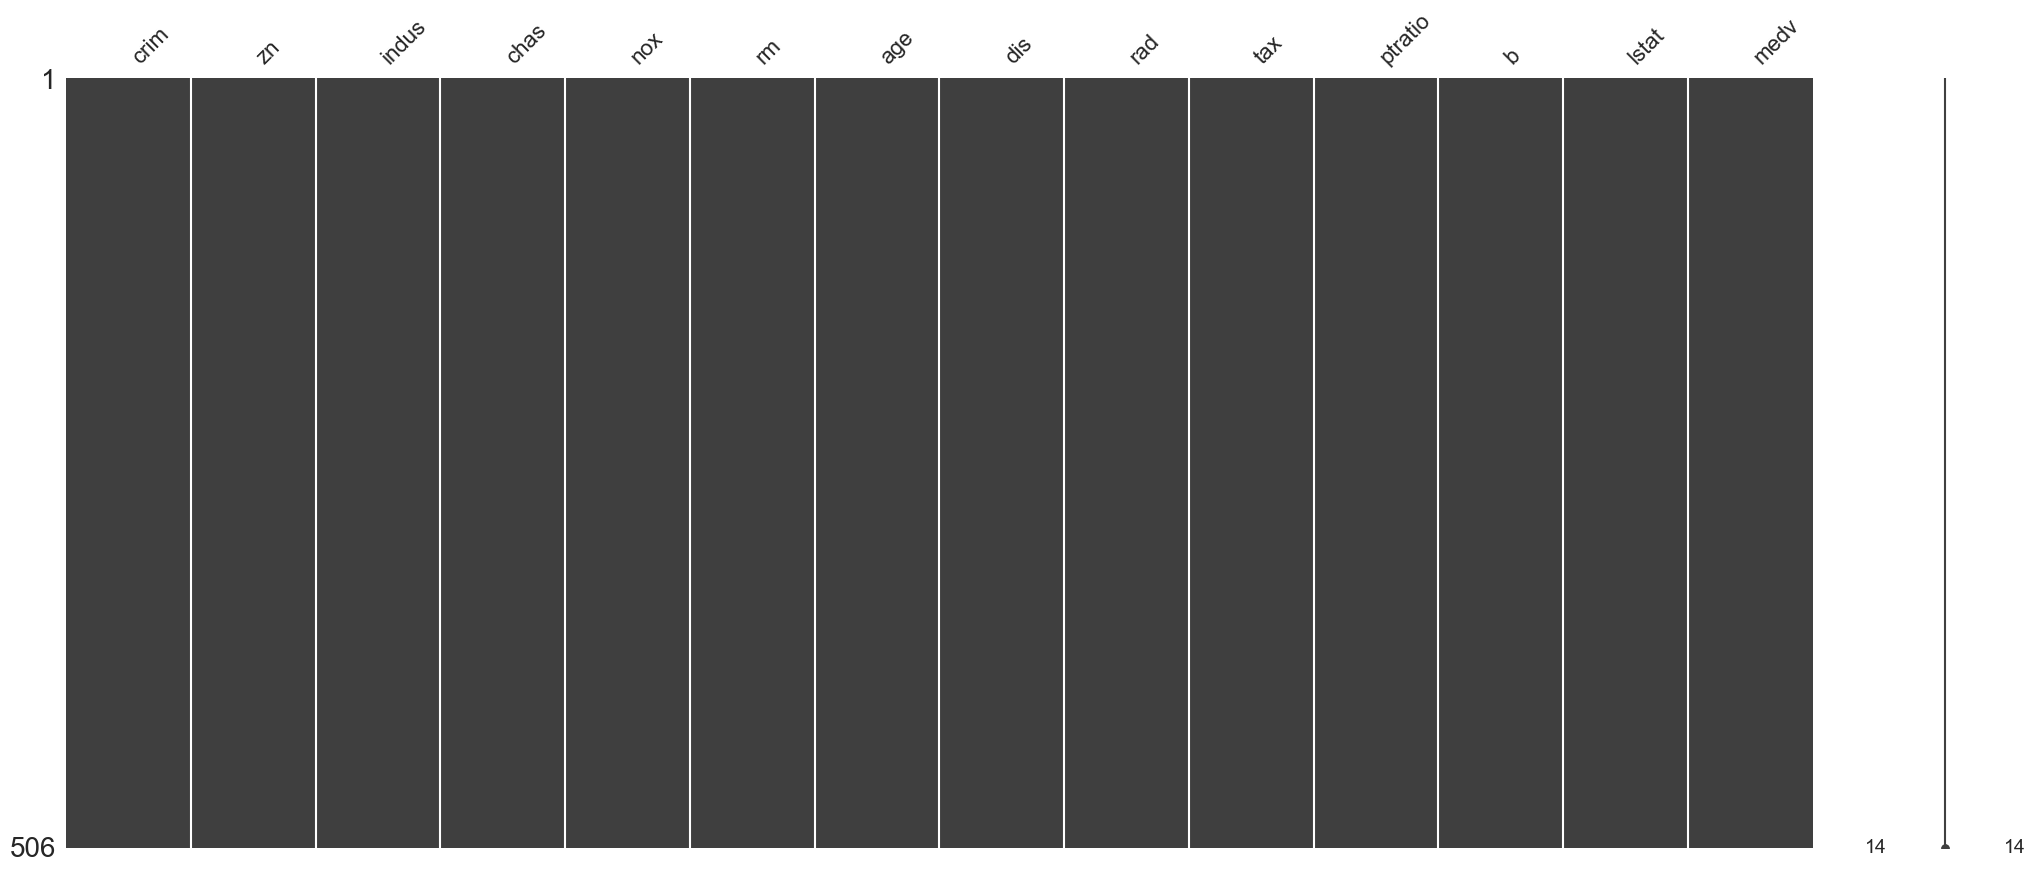

In [29]:
# MISSING VALUES
import missingno as msno
msno.matrix(df)

#### Insights
1. No missing values

In [30]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [31]:
#UNIVARIATE ANALYSIS
import plotly.figure_factory as ff

for i in df.columns:

    hist_data = [df[i]]
    group_labels = [i] # name of the column

    fig = ff.create_distplot(hist_data, group_labels)
    fig.show()

#### Insights
1. crim , nox and dis are right skewed # log transformation
2. B and Age are left skewed # box cox transformation
3. Tax and Zn do not show any kind of distribution

In [32]:
# TRIVARIATE ANALYSIS WITH TARGET VARIABLE MEDV 
for i in df.columns:
    if i not in ['medv','chas']:
        fig = px.scatter(df,x=i,y='medv',color='chas',trendline='ols')
        fig.show()

#### Insights:
1. crim , indus , nox , age , ptratio, lstat show some degree of inverse linear relationship
2. Zn , rm and dis show a direct linear relationship
3. Others show weak relationship

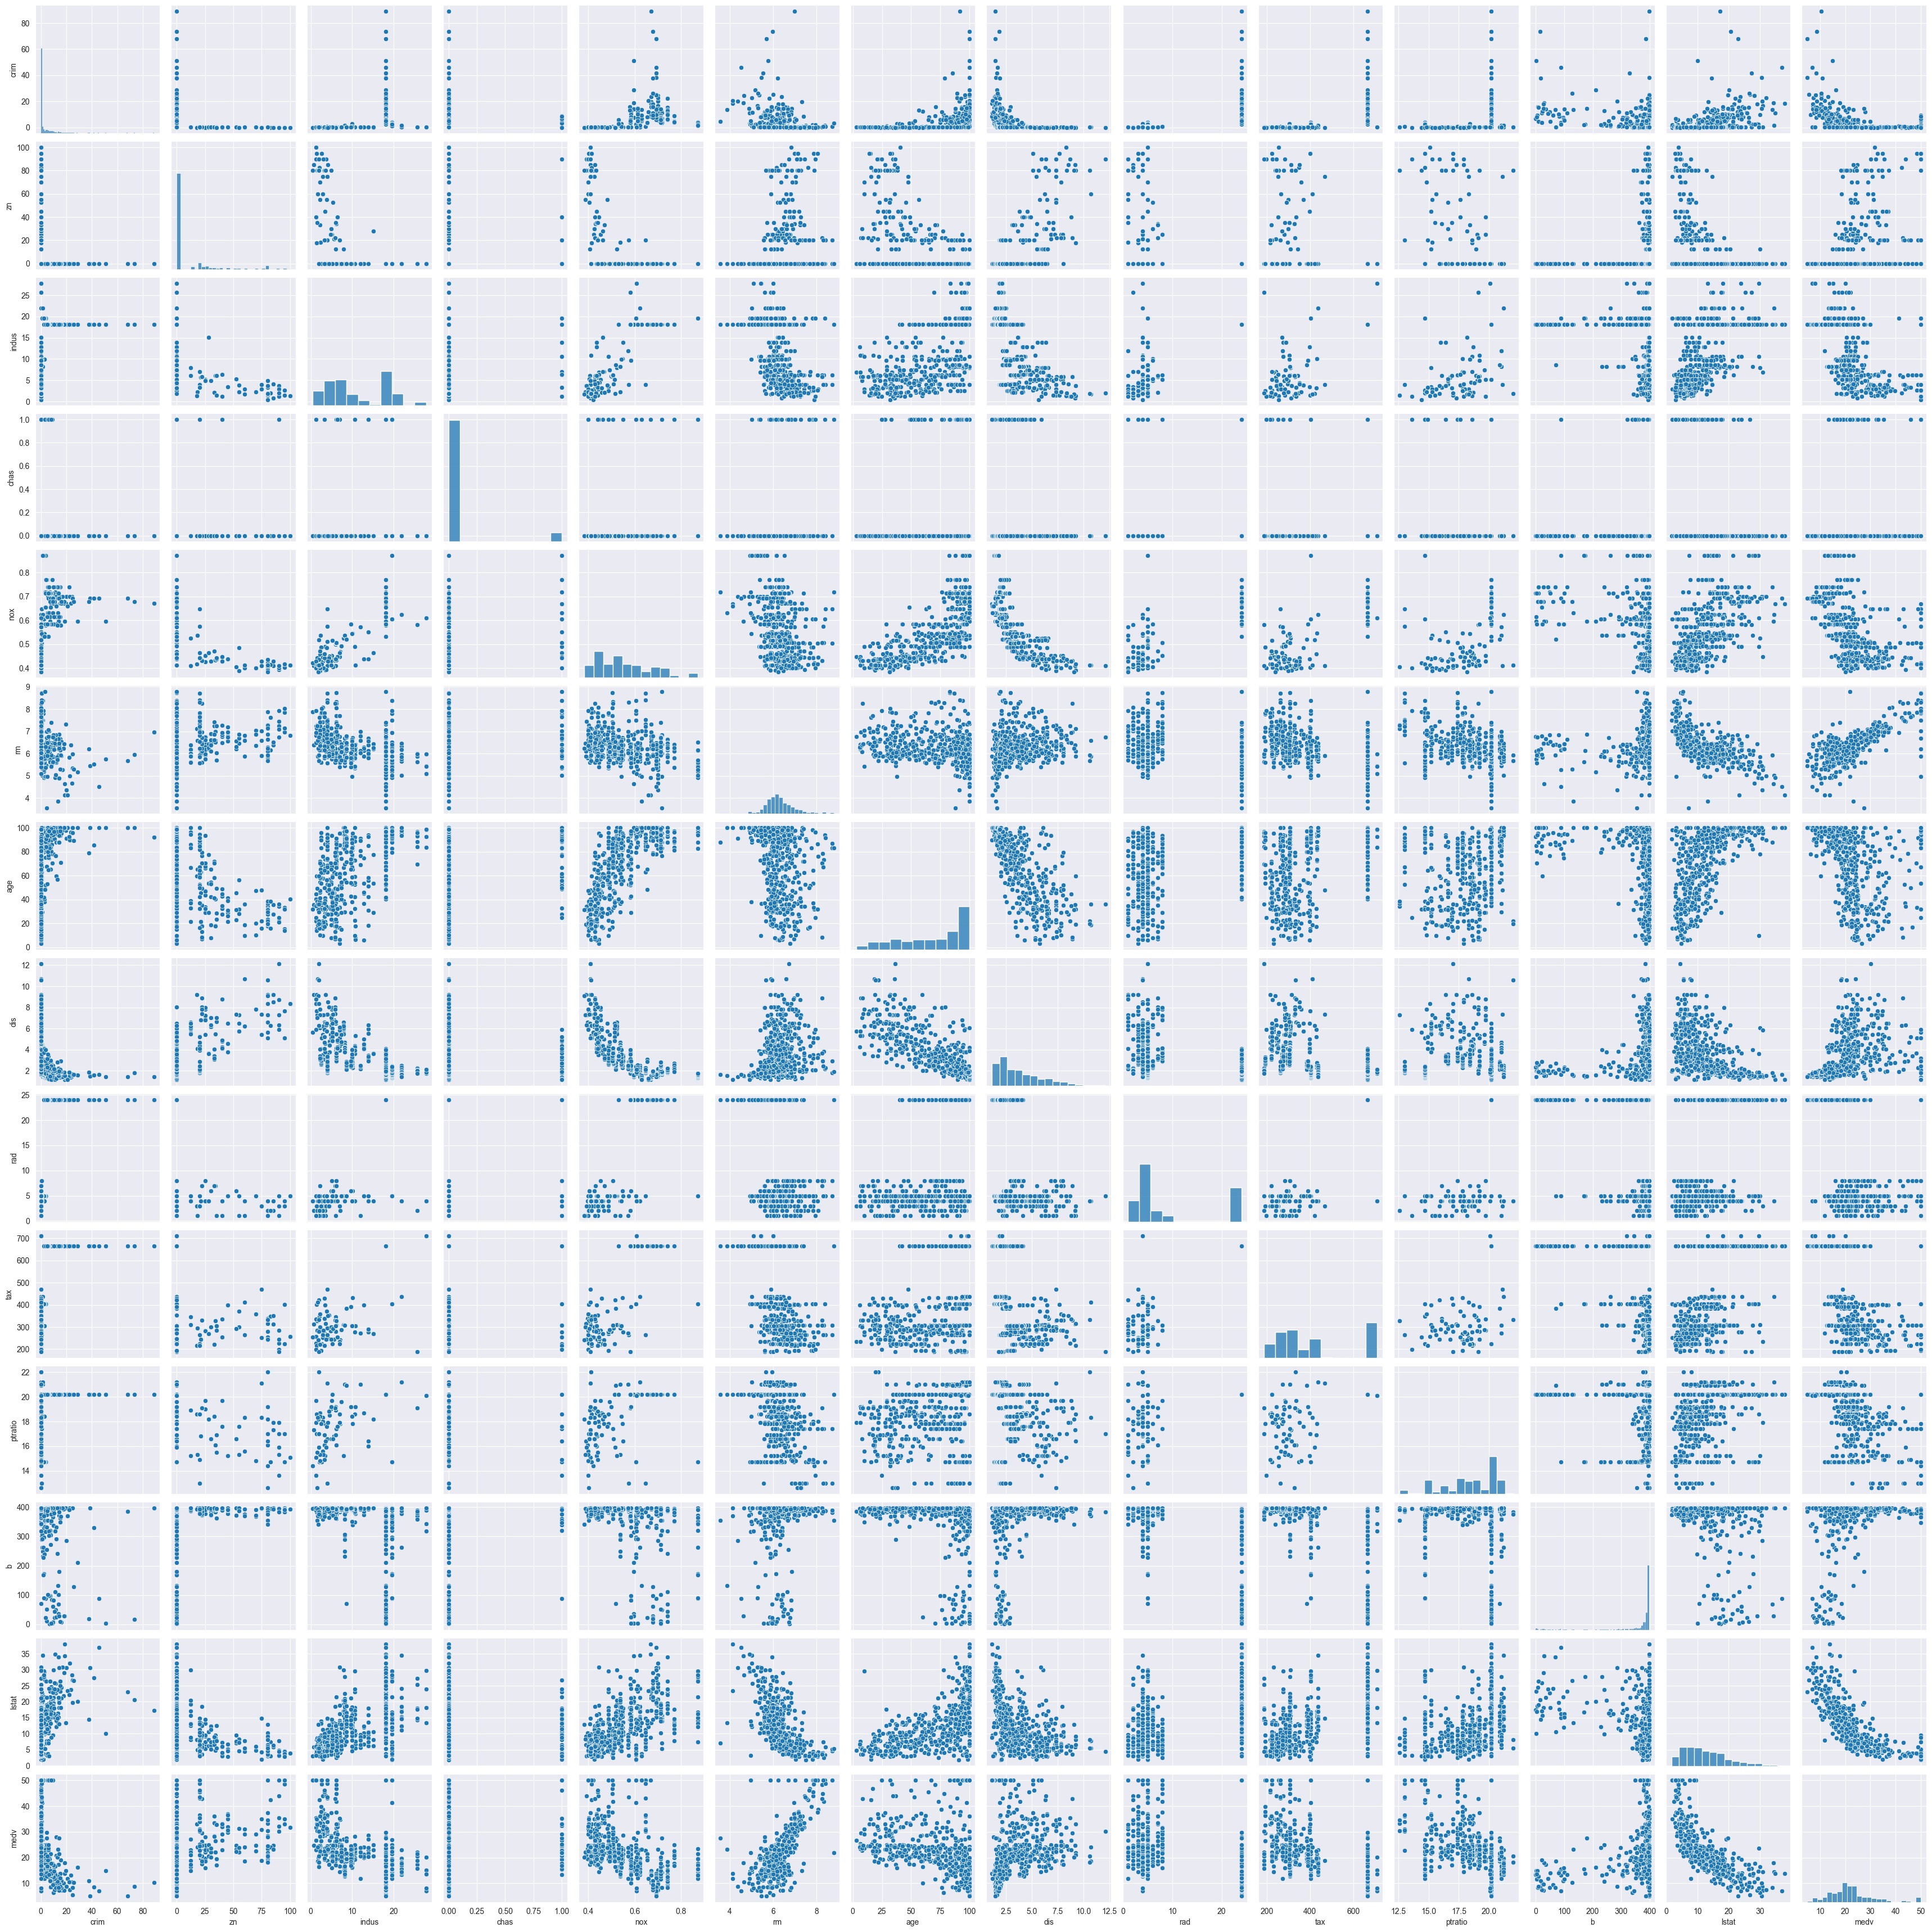

In [33]:
#MULTIVARIATE
sns.pairplot(df)

<Axes: >

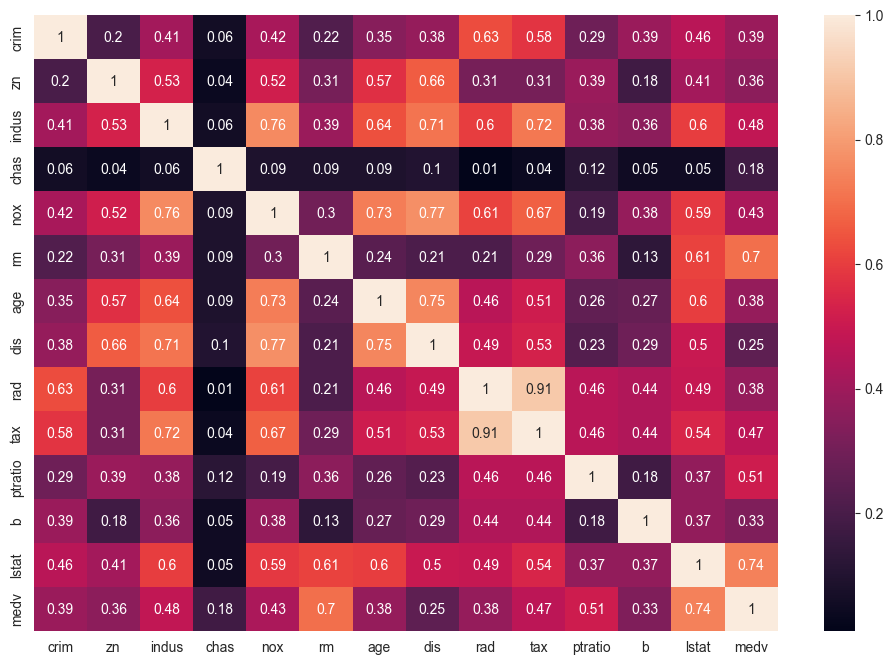

In [34]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr().round(2).abs(),annot=True)

#### Insights:
1. chas is categorical and needs to be excluded from correlation
2. No multicollinearity observed

## Model Building

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
#from sklearn.preprocessing import OrdinalEncoder # Ordinal Encoding
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
#from sklearn.feature_selection  import VarianceThreshold

In [36]:
X = df.drop('medv',axis=1)
y = df['medv']

In [37]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [38]:
numerical_cols = df.select_dtypes(include=['float','int']).columns[:-1]
numerical_cols

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat'],
      dtype='object')

In [39]:
## Numerical Pipeline
num_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())

    ]

)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
])

In [40]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [42]:
models = {
    'Linear_Regression' : LinearRegression(),
    'Random_Forest': RandomForestRegressor()
}

In [43]:
def model_trainer(X_train,X_test,y_train,y_test,models):
    """takes a dictionary of models and returns
    the r2 score for each model in a dataframe

    Args:
        X_train (_type_): X_train 
        X_test (_type_): X_test 
        y_train (_type_): y_train 
        y_test (_type_): y_test 
        models (_type_): dictionary of models

    Returns:
        DataFrame : models and the r2 score for each model
    """
    mod = []
    r2_value = []
    for i in models:
        model = models[i]
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test,y_pred)
        mod.append(i)
        r2_value.append(r2)
    return pd.DataFrame({
        'model':mod,
        'r2_score':r2_value
    })


In [44]:
model_trainer(X_train,X_test,y_train,y_test,models)

model  r2_score
0  Linear_Regression  0.778941
1      Random_Forest  0.917372